In [25]:
import os
import pandas as pd
import json
import yaml
import matplotlib.pyplot as plt

In [26]:
def get_df_annotations(annotations_file_path: str):
    with open(annotations_file_path) as file:
        json_data = json.load(file) 
    df = pd.DataFrame(json_data["annotations"])
    return df

In [27]:
df = get_df_annotations("../data/rtsi-annotations/train_anno.json")
with open("../data/rtsi-annotations/config.yaml") as file:
    config = yaml.safe_load(file)
label_names = config["names"] 

In [28]:
df

,id,image_id,category_id,area,bbox,iscrowd
0,0,0,1,324,"[649, 376, 18, 18]",0
1,1,1,1,420,"[671, 356, 20, 21]",0
2,2,2,1,702,"[711, 332, 27, 26]",0
3,3,3,1,1332,"[764, 290, 37, 36]",0
4,4,3,2,289,"[684, 384, 17, 17]",0
...,...,...,...,...,...,...
95487,104353,59183,116,432,"[622, 394, 27, 16]",0
95488,104354,59184,116,558,"[638, 387, 31, 18]",0
95489,104355,59185,116,660,"[647, 385, 33, 20]",0
95490,104356,59186,116,943,"[668, 378, 41, 23]",0


In [29]:
df["category_name"] = df["category_id"].map(lambda value: label_names[value - 1])
df["category_name"]

0           2_1
1           2_1
2           2_1
3           2_1
4          1_23
          ...  
95487    5_15_7
95488    5_15_7
95489    5_15_7
95490    5_15_7
95491    5_15_7
Name: category_name, Length: 95492, dtype: object

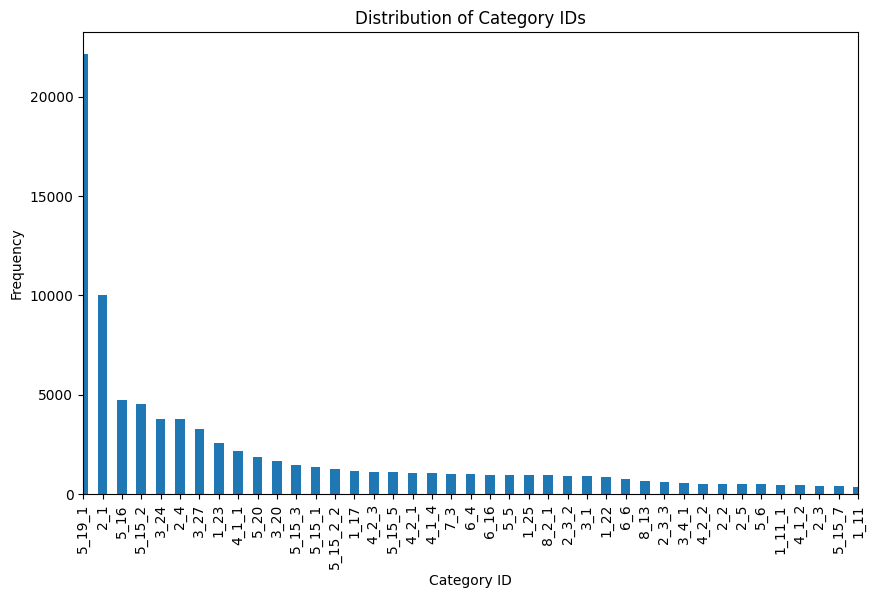

In [36]:
plt.figure(figsize=(10, 6))
df["category_name"].value_counts().plot(kind='bar')
plt.xlim(0, 40)
plt.xlabel('Category ID')
plt.ylabel('Frequency')
plt.title('Distribution of Category IDs')
plt.show()

In [43]:
pd.set_option('display.max_rows', None)
print( df['category_name'].value_counts())

category_name
5_19_1      22147
2_1         10027
5_16         4727
5_15_2       4504
3_24         3761
2_4          3755
3_27         3268
1_23         2558
4_1_1        2137
5_20         1853
3_20         1661
5_15_3       1448
5_15_1       1362
5_15_2_2     1274
1_17         1149
4_2_3        1114
5_15_5       1100
4_2_1        1071
4_1_4        1063
7_3          1011
6_4           979
6_16          957
5_5           946
1_25          935
8_2_1         933
2_3_2         912
3_1           909
1_22          866
6_6           747
8_13          647
2_3_3         577
3_4_1         526
4_2_2         502
2_2           501
2_5           495
5_6           473
1_11_1        441
4_1_2         429
2_3           410
5_15_7        392
1_11          350
1_20_2        347
1_8           326
3_21          321
1_16          310
3_28          305
7_5           304
8_15          292
5_14          283
1_2           278
3_13          253
3_18          252
6_3_1         241
1_15          215
1_1           

In [45]:
required_signs = ["2_1",
                  "2_3_2",
                  "2_4",
                  "3_18_1",
                  "3_18_2",
                  "4_1_3",
                  "4_1_4",
                  "5_15_3",
                  "5_15_4",
                  "5_15_5",
                  "5_15_6",
                  "6_3_1",
                  "6_8_1"]

5155